In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r'C:\Users\darre\DataProjects\data\olist_customers_dataset.csv')
orders = pd.read_csv(r'C:\Users\darre\DataProjects\data\olist_orders_dataset.csv')
order_items = pd.read_csv(r'C:\Users\darre\DataProjects\data\olist_order_items_dataset.csv')
products = pd.read_csv(r'C:\Users\darre\DataProjects\data\olist_products_dataset.csv')

# Display the first few rows of each dataset
print("Customers:")
print(customers.head())
print("\nOrders:")
print(orders.head())
print("\nOrder Items:")
print(order_items.head())
print("\nProducts:")
print(products.head())

Customers:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Orders:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e7618

In [2]:
# Check data types and missing values
print("Customers Info:")
print(customers.info())
print("\nOrders Info:")
print(orders.info())
print("\nOrder Items:")
print(order_items.info())
print("\nProducts Info:")
print(products.info())

# Check for duplicates
print("\nDuplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Orders:", orders.duplicated().sum())
print("Duplicates in Order Items:", order_items.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timest

In [3]:
# Handle missing values in Orders
# Fill missing timestamps with a placeholder or drop if irrelevant
orders.fillna({
    'order_approved_at': 'Not Approved',
    'order_delivered_carrier_date': 'Not Delivered to Carrier',
    'order_delivered_customer_date': 'Not Delivered'
}, inplace=True)

# Handle missing values in Products
# Fill missing product category with 'Unknown'
# Fill numerical columns with median or 0
products.fillna({
    'product_category_name':'Unknown',
    'product_name_lenght': products['product_name_lenght'].median(),
    'product_description_lenght': products['product_description_lenght'].median(),
    'product_photos_qty': 0,
    'product_weight_g': products['product_weight_g'].median(),
    'product_length_cm': products['product_length_cm'].median(),
    'product_height_cm': products['product_height_cm'].median(),
    'product_width_cm': products['product_width_cm'].median()
},inplace=True)

# Verify missing values are handled
print("Missing values after cleaning:")
print("Orders:", orders.isnull().sum())
print("Products:", products.isnull().sum())

Missing values after cleaning:
Orders: order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
Products: product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [4]:
# Convert timestamp columns in Orders to datetime (where applicable)
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
# Only convert non-placeholder values to datetime
orders.loc[orders['order_approved_at'] != 'Not Approved', 'order_approved_at'] = pd.to_datetime(
    orders.loc[orders['order_approved_at'] != 'Not Approved', 'order_approved_at'])
orders.loc[orders['order_delivered_carrier_date'] != 'Not Delivered to Carrier', 'order_delivered_carrier_date'] = pd.to_datetime(
    orders.loc[orders['order_delivered_carrier_date'] != 'Not Delivered to Carrier', 'order_delivered_carrier_date'])
orders.loc[orders['order_delivered_customer_date'] != 'Not Delivered', 'order_delivered_customer_date'] = pd.to_datetime(
    orders.loc[orders['order_delivered_customer_date'] != 'Not Delivered', 'order_delivered_customer_date'])

# Convert shipping_limit_date in Order Items to datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# Verify data types
print("Orders Data Types:")
print(orders.dtypes)
print("\nOrder Items Data Types:")
print(order_items.dtypes)

Orders Data Types:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
dtype: object

Order Items Data Types:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


In [5]:
# Merge datasets
# orders and customers
df = orders.merge(customers, on='customer_id', how='left')
# then order_items
df = df.merge(order_items, on='order_id', how='left')
# then products
df = df.merge(products, on='product_id', how='left')

# Check merged dataset
print("Merged Dataset Shape:", df.shape)
print("\nMerged Dataset Info:")
print(df.info())
print("\nMissing Values in Merged Dataset:")
print(df.isnull().sum())

Merged Dataset Shape: (113425, 26)

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113425 non-null  object        
 5   order_delivered_carrier_date   113425 non-null  object        
 6   order_delivered_customer_date  113425 non-null  object        
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_ci

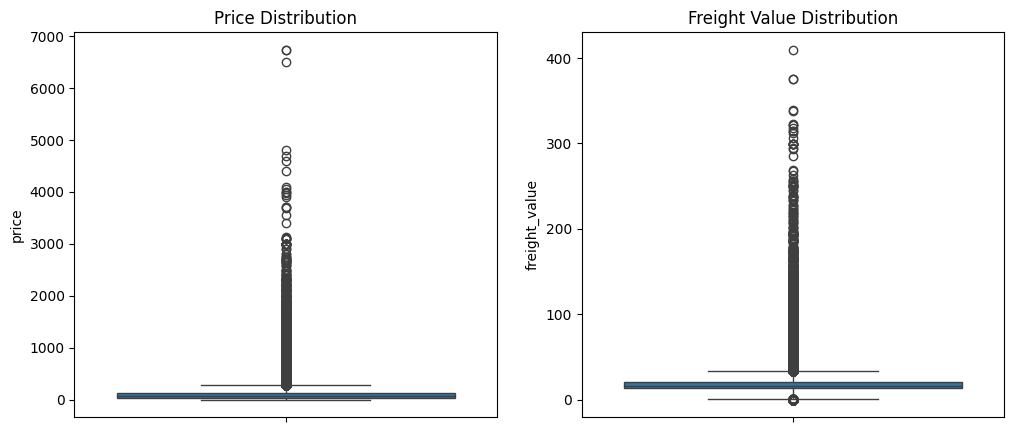

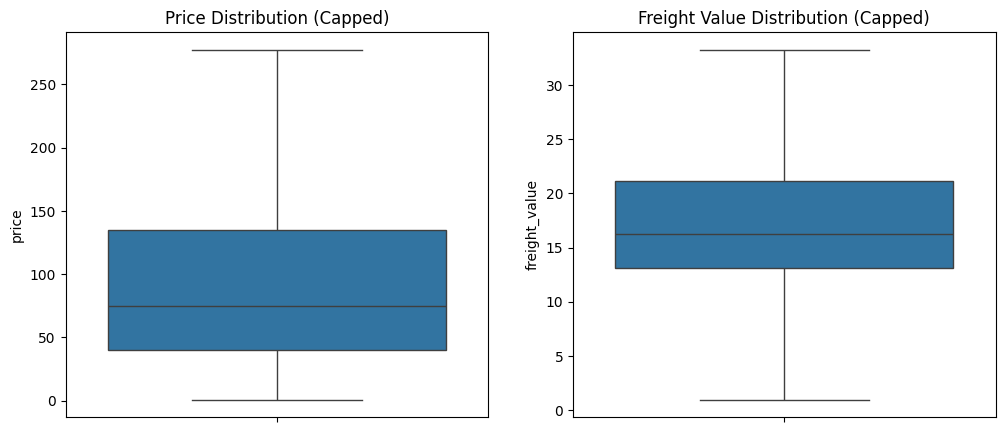

In [7]:
#Visualize price and freight_value distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Price Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['freight_value'])
plt.title('Freight Value Distribution')
plt.show()

# Cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply to price and freight_value
df = cap_outliers(df, 'price')
df = cap_outliers(df, 'freight_value')

# Verify outlier handling
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Price Distribution (Capped)')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['freight_value'])
plt.title('Freight Value Distribution (Capped)')
plt.show()

In [8]:
# Save cleaned dataset
df.to_csv (r'C:\Users\darre\DataProjects\data\cleaned_ecommerce_data.csv')
print("Cleaned dataset save to '../data/cleaned_ecommerce_data.csv'")

Cleaned dataset save to '../data/cleaned_ecommerce_data.csv'
